In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import json

In [109]:
def linear(T, a, b):
    return a + b * T

def inverse(T, a, b):
    return a / (T + b)

def log(T, a, b):
    return a + b * np.log(T)

In [110]:
df_he = pd.read_csv('He_property.csv')
df_he
T = df_he['T [C]']
rho = df_he['rho [kg/m3]']
Cp = df_he['Cp [J/mol*K]']
mu = df_he['mu [Pa*s]']
k = df_he['Tc [W/m*K]']

In [111]:
p_rho, _ = curve_fit(inverse,T,rho)
a_rho_he, b_rho_he = p_rho
print(a_rho_he, b_rho_he)
rho_fit = inverse(T, a_rho_he, b_rho_he)

p_Cp, _ = curve_fit(linear,T,Cp)
a_Cp_he, b_Cp_he = p_Cp
print(a_Cp_he, b_Cp_he)
Cp_fit = linear(T, a_Cp_he, b_Cp_he)

p_mu, _ = curve_fit(linear,T,mu)
a_mu_he, b_mu_he = p_mu
print(a_mu_he, b_mu_he)
mu_fit = linear(T, a_mu_he, b_mu_he)

p_k, _ = curve_fit(linear,T,k)
a_k_he, b_k_he = p_k
print(a_k_he, b_k_he)
k_fit = linear(T, a_k_he, b_k_he)


48.77423454352213 273.26971836853033
20.785999999999866 2.2204460733137745e-16
2.0394315853453057e-05 3.4578133403303336e-08
0.16046998254765255 0.0002680933197293234


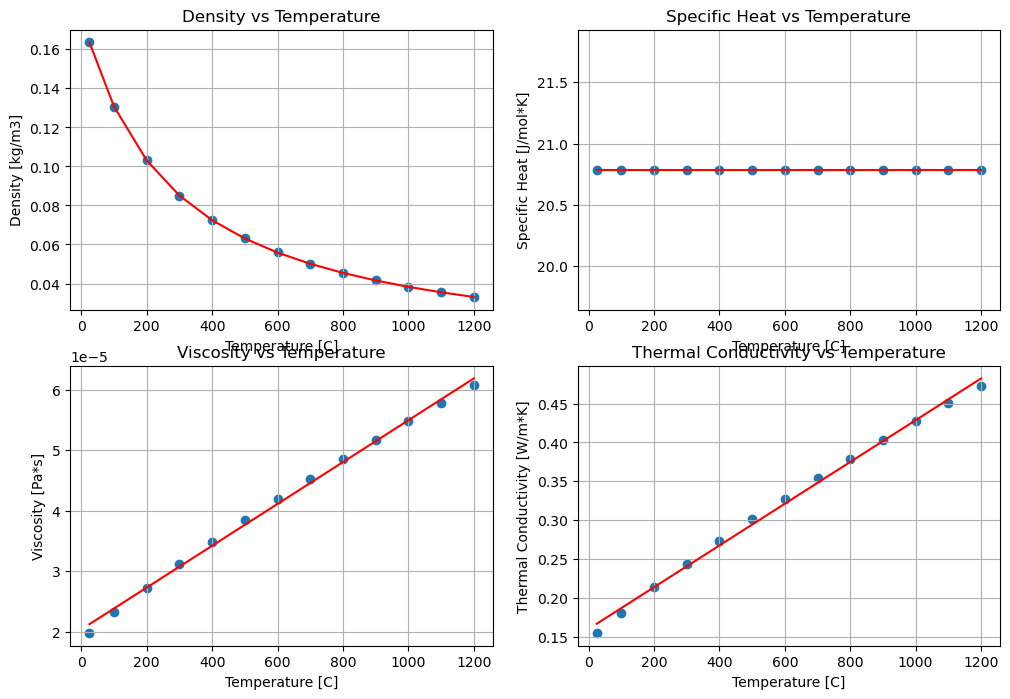

In [112]:
figure, ax = plt.subplots(2, 2, figsize=(12,8))
ax[0,0].scatter(T, rho)
ax[0,0].plot(T, rho_fit, 'r-')
ax[0,0].set_xlabel('Temperature [C]')
ax[0,0].set_ylabel('Density [kg/m3]')
ax[0,0].set_title('Density vs Temperature')
ax[0,0].grid(True)

ax[0,1].scatter(T, Cp)
ax[0,1].plot(T, np.ones_like(T)*Cp[0], 'r-')
ax[0,1].set_xlabel('Temperature [C]')
ax[0,1].set_ylabel('Specific Heat [J/mol*K]')
ax[0,1].set_title('Specific Heat vs Temperature')
ax[0,1].grid(True)

ax[1,0].scatter(T, mu)
ax[1,0].plot(T, mu_fit, 'r-')
ax[1,0].set_xlabel('Temperature [C]')
ax[1,0].set_ylabel('Viscosity [Pa*s]')
ax[1,0].set_title('Viscosity vs Temperature')
ax[1,0].grid(True)

ax[1,1].scatter(T, k)
ax[1,1].plot(T, k_fit, 'r-')
ax[1,1].set_xlabel('Temperature [C]')
ax[1,1].set_ylabel('Thermal Conductivity [W/m*K]')
ax[1,1].set_title('Thermal Conductivity vs Temperature')
ax[1,1].grid(True)


In [113]:
df_kanthal = pd.read_csv('KanthalD_property.csv')
df_kt_rho = df_kanthal[df_kanthal['rho [kg/m3]'].notna()][['T [C]', 'rho [kg/m3]']]
df_kt_er = df_kanthal[df_kanthal['resistivity [ohm*m2/m]'].notna()][['T [C]', 'resistivity [ohm*m2/m]']]
df_kt_k = df_kanthal[df_kanthal['k [W/m*K]'].notna()][['T [C]', 'k [W/m*K]']]
df_kt_cp = df_kanthal[df_kanthal['Cp [kJ/kg*K]'].notna()][['T [C]', 'Cp [kJ/kg*K]']]
df_kt_rho

p_er, _ = curve_fit(linear, df_kt_er['T [C]'], df_kt_er['resistivity [ohm*m2/m]'])
a_er_kt, b_er_kt = p_er
print(a_er_kt, b_er_kt)
er_fit = linear(df_kt_er['T [C]'], a_er_kt, b_er_kt)

p_k, _ = curve_fit(linear, df_kt_k['T [C]'], df_kt_k['k [W/m*K]'])
a_k_kt, b_k_kt = p_k
print(a_k_kt, b_k_kt)
k_fit = linear(df_kt_k['T [C]'], a_k_kt, b_k_kt)

p_cp, _ = curve_fit(log, df_kt_cp['T [C]'], df_kt_cp['Cp [kJ/kg*K]'])
a_cp_kt, b_cp_kt = p_cp
print(a_cp_kt, b_cp_kt)
cp_fit = log(df_kt_cp['T [C]'], a_cp_kt, b_cp_kt)


1.344300091888754e-06 9.618305579811222e-11
10.719151670951065 0.014357326478149024
0.23087995300334171 0.06962717922734497


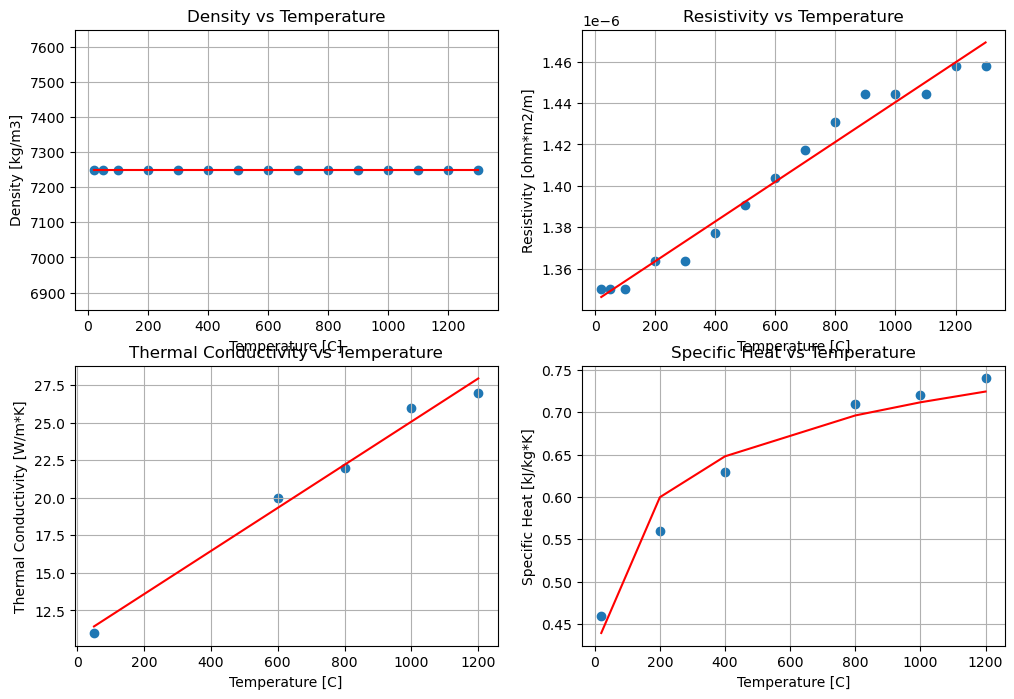

In [114]:
figure, ax = plt.subplots(2,2, figsize=(12,8))

ax[0,0].scatter(df_kt_rho['T [C]'], df_kt_rho['rho [kg/m3]'])
ax[0,0].plot(df_kt_rho['T [C]'], np.ones_like(df_kt_rho['T [C]'])*df_kt_rho['rho [kg/m3]'].iloc[0], 'r-')
ax[0,0].set_xlabel('Temperature [C]')
ax[0,0].set_ylabel('Density [kg/m3]')
ax[0,0].set_title('Density vs Temperature')
ax[0,0].grid(True)

ax[0,1].scatter(df_kt_er['T [C]'], df_kt_er['resistivity [ohm*m2/m]'])
ax[0,1].plot(df_kt_er['T [C]'],er_fit, 'r-')
ax[0,1].set_xlabel('Temperature [C]')
ax[0,1].set_ylabel('Resistivity [ohm*m2/m]')
ax[0,1].set_title('Resistivity vs Temperature')
ax[0,1].grid(True)

ax[1,0].scatter(df_kt_k['T [C]'], df_kt_k['k [W/m*K]'])
ax[1,0].plot(df_kt_k['T [C]'], k_fit, 'r-')
ax[1,0].set_xlabel('Temperature [C]')
ax[1,0].set_ylabel('Thermal Conductivity [W/m*K]')
ax[1,0].set_title('Thermal Conductivity vs Temperature')
ax[1,0].grid(True)

ax[1,1].scatter(df_kt_cp['T [C]'], df_kt_cp['Cp [kJ/kg*K]'])
ax[1,1].plot(df_kt_cp['T [C]'], cp_fit, 'r-')
ax[1,1].set_xlabel('Temperature [C]')
ax[1,1].set_ylabel('Specific Heat [kJ/kg*K]')
ax[1,1].set_title('Specific Heat vs Temperature')
ax[1,1].grid(True)





In [115]:
params = {
    'helium': {
        'rho': {
            'a': a_rho_he,
            'b': b_rho_he,
            'function': 'inverse',
            'unit': 'g/ml'
        },
        'Cp': {
            'a': 20.786,
            'b': 0,
            'function': 'constant',
            'unit': 'J/mol/K'
        },
        'mu': {
            'a': a_mu_he,
            'b': b_mu_he,
            'function': 'linear',
            'unit': 'Pa*s'
        },
        'k': {
            'a': a_k_he,
            'b': b_k_he,
            'function': 'linear',
            'unit': 'W/m/K'
        }
    },
    'kanthal': {
        'rho': {
            'a': 7250,
            'b': 0,
            'function': 'constant',
            'unit': 'kg/m3'
        },
        'Cp': {
            'a': a_cp_kt,
            'b': b_cp_kt,
            'function': 'log',
            'unit': 'kJ/kg/K'
        },
        'k': {
            'a': a_k_kt,
            'b': b_k_kt,
            'function': 'linear',
            'unit': 'W/m/K'
        },
        'er': {
            'a': a_er_kt,
            'b': b_er_kt,
            'function': 'linear',
            'unit': 'ohm*m2/m'
        }   
    }
}
with open('property.json', 'w', encoding='utf-8') as f:
    json.dump(params, f, ensure_ascii=False, indent=4)

